In [2]:
from NO_utils import extract_data, plot_geometry, plot_eigenvectors
import os
import matplotlib.pyplot as plt
import numpy as np
import random

## Load and visualize data

In [4]:
# Load and extract data
datafolder_name = ["OUTPUT", "discrete_symmetric_p32_n400_rs0"]
data_path = os.path.join(*datafolder_name)
print(data_path)

designs, design_params, n_designs, n_panes, design_res, WAVEVECTOR_DATA, n_dim, n_wavevectors, EIGENVALUE_DATA, n_bands, EIGENVECTOR_DATA_x, EIGENVECTOR_DATA_y, const, N_struct, imag_tol, rng_seed_offset = extract_data(data_path)

OUTPUT\discrete_symmetric_p32_n400_rs0
Data loaded in 412.50 seconds.
n_designs: 400, n_panes: 3, design_res: 32, d_design: 2, dispersion_bands: 6, rng_seed_offset: [[0.]]
EIGENVALUE_DATA shape: (400, 325, 6)
EIGENVECTOR_DATA shape: (400, 325, 6, 2048)
EIGENVECTOR_DATA_x shape: (400, 325, 6, 32, 32)
EIGENVECTOR_DATA_y shape: (400, 325, 6, 32, 32)
WAVEVECTOR_DATA shape: (400, 325, 2)
designs shape: (400, 3, 32, 32)
design_params shape: (1, 6)
const shape: {'E_max': (1, 1), 'E_min': (1, 1), 'N_eig': (1, 1), 'N_ele': (1, 1), 'N_pix': (1, 1), 'N_wv': (2, 1), 'a': (1, 1), 'design': (3, 32, 32), 'design_scale': (6, 1), 'isSaveEigenvectors': (1, 1), 'isUseGPU': (1, 1), 'isUseImprovement': (1, 1), 'isUseParallel': (1, 1), 'isUseSecondImprovement': (1, 1), 'poisson_max': (1, 1), 'poisson_min': (1, 1), 'rho_max': (1, 1), 'rho_min': (1, 1), 'sigma_eig': (1, 1), 'symmetry_type': (4, 1), 't': (1, 1), 'wavevectors': (2, 325)}


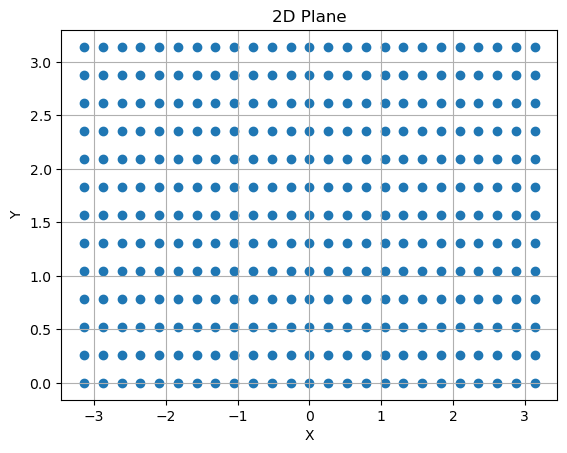

In [5]:
# View distribution of wavevectors in 2D plane
fig, ax = plt.subplots()
ax.scatter(WAVEVECTOR_DATA[0,:,0], WAVEVECTOR_DATA[0,:,1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Plane')
ax.grid(True)
plt.show()

In [6]:
# Draw a random design and its corresponding eigenvectors
sample_index = np.random.randint(0, n_designs)
sample_geometry = designs[sample_index, 0]
sample_band = np.random.randint(0, n_bands)
sample_wavevector = np.random.randint(0, n_wavevectors)
print(f'Design: {sample_index}, Band: {sample_band}, Wavevector: {sample_wavevector}')

Design: 16, Band: 0, Wavevector: 60


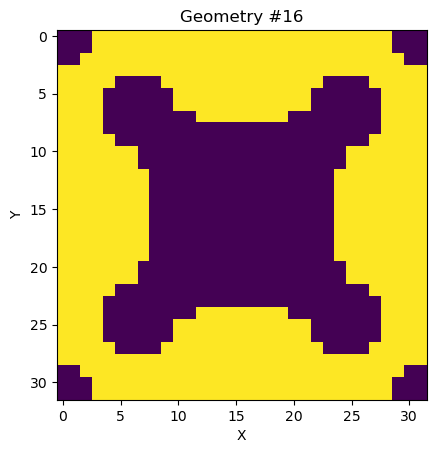

Wavevector index: 60, components: [-2.094  2.094]


In [7]:
# View a geometry design
plot_geometry(sample_geometry, sample_index)
print(f'Wavevector index: {sample_wavevector}, components: {WAVEVECTOR_DATA[sample_index,sample_wavevector]}')

Design: 16, Band: 0, Wavevector: 60


A:\Research\Projects\NO 2D Metamaterials\NO_utils.py:166: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


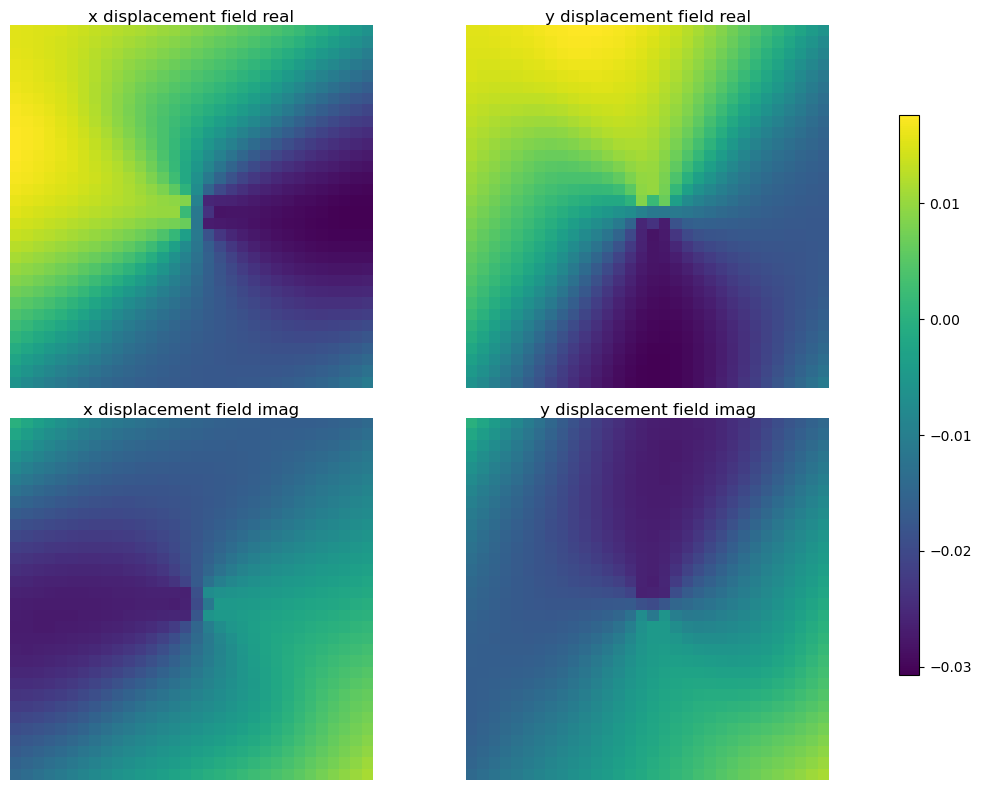

In [8]:
# View eigenvectors for the selected design, band, and wavevector
print(f'Design: {sample_index}, Band: {sample_band}, Wavevector: {sample_wavevector}')
sample_eigenvector_x = EIGENVECTOR_DATA_x[sample_index, sample_wavevector, sample_band]
sample_eigenvector_y = EIGENVECTOR_DATA_y[sample_index, sample_wavevector, sample_band]

plot_eigenvectors(sample_eigenvector_x, sample_eigenvector_y, unify_scales=True)